# Importing Libraries

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,GridSearchCV,train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [38]:
db= pd.read_csv('processed_data.csv')

# Select Strong Features for Modeling

In [39]:
strong_features = ['AGE', 'BMI', 'HbA1c', 'CLASS']
data_strong = db[strong_features]
X = db.drop('CLASS', axis=1)
y = db['CLASS']

# Categorical Naive Bayes , GridSearchCV on All Features

In [40]:
num_features = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
kbd = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
X[num_features] = kbd.fit_transform(X[num_features])
# Train-test split (for final evaluation)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# K-Folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Grid search for best alpha
params = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}

grid_nb = GridSearchCV(CategoricalNB(), params, cv=kf)
grid_nb.fit(X_train, y_train)
print("\n\n---- All Features ----")
print("Best alpha:", grid_nb.best_params_)
print("Best mean CV accuracy:", grid_nb.best_score_)
print("-------------------------------------------")
# ---------------- EVALUATE ON TEST DATA -----------------------
best_nb = grid_nb.best_estimator_

y_pred = best_nb.predict(X_test)
test_accuracy = best_nb.score(X_test, y_test)
print("Final Test Accuracy:", test_accuracy)

c:\Users\abdel\anaconda3\envs\py12\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(




---- All Features ----
Best alpha: {'alpha': 0.5}
Best mean CV accuracy: 0.9375
-------------------------------------------
Final Test Accuracy: 0.97


# Confusion Matrix & Classification Report — Naive Bayes (All Features)


Classification Report:
              precision    recall  f1-score   support

         Non       0.91      1.00      0.95        21
     Predict       0.75      0.60      0.67        10
    Diabetic       0.99      0.99      0.99       169

    accuracy                           0.97       200
   macro avg       0.88      0.86      0.87       200
weighted avg       0.97      0.97      0.97       200



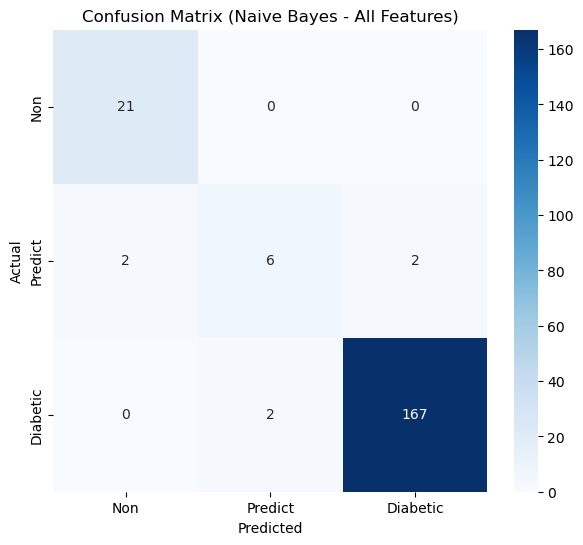

In [41]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Classification report (Precision, Recall, F1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Non', 'Predict', 'Diabetic']))

# ----- Plot Confusion Matrix -----
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non', 'Predict', 'Diabetic'],
            yticklabels=['Non', 'Predict', 'Diabetic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Naive Bayes - All Features)")
plt.show()

# Categorical Naive Bayes — GridSearchCV on Strong Features (AGE, BMI, HbA1c)

In [42]:
# ------------------- 2. Strong Features -------------------------
X_strong_bayesian = data_strong.drop('CLASS', axis=1)
y_strong_bayesian = data_strong['CLASS']

num_strong_features = ['AGE', 'BMI', 'HbA1c']
kbd = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
X_strong_bayesian[num_strong_features] = kbd.fit_transform(X_strong_bayesian[num_strong_features])

# Train-test split (for final evaluation)
X_train_strong, X_test_strong, y_train_strong, y_test_strong = train_test_split(
    X_strong_bayesian, y_strong_bayesian, test_size=0.2, random_state=42, stratify=y_strong_bayesian
)

# K-Folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Grid search for best alpha
params = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}

grid_nb_strong = GridSearchCV(CategoricalNB(), params, cv=kf)
grid_nb_strong.fit(X_train_strong, y_train_strong)

print("\n\n---- Strong Features ----")
print("Best alpha:", grid_nb_strong.best_params_)
print("Best mean CV accuracy:", grid_nb_strong.best_score_)
print("-------------------------------------------")
# ---------------- EVALUATE ON TEST DATA -----------------------
best_nb_strong = grid_nb_strong.best_estimator_

y_pred_strong = best_nb_strong.predict(X_test_strong)
test_accuracy_strong = best_nb_strong.score(X_test_strong, y_test_strong)
print("Final Test Accuracy:", test_accuracy_strong)

c:\Users\abdel\anaconda3\envs\py12\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(




---- Strong Features ----
Best alpha: {'alpha': 0.1}
Best mean CV accuracy: 0.91875
-------------------------------------------
Final Test Accuracy: 0.96


# Confusion Matrix & Classification Report — Naive Bayes (Strong Features)


Classification Report:
              precision    recall  f1-score   support

         Non       0.88      1.00      0.93        21
     Predict       0.71      0.50      0.59        10
    Diabetic       0.98      0.98      0.98       169

    accuracy                           0.96       200
   macro avg       0.86      0.83      0.83       200
weighted avg       0.96      0.96      0.96       200



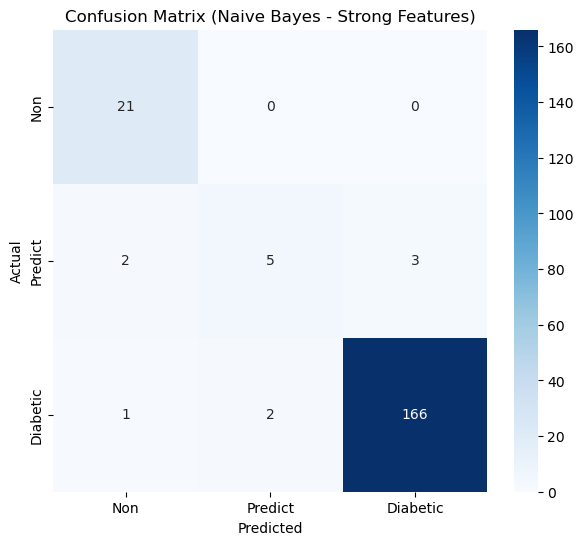

In [43]:
# Confusion matrix
cm_strong = confusion_matrix(y_test_strong, y_pred_strong)

# Classification report (Precision, Recall, F1)
print("\nClassification Report:")
print(classification_report(y_test_strong, y_pred_strong, target_names=['Non', 'Predict', 'Diabetic']))

# ----- Plot Confusion Matrix -----
plt.figure(figsize=(7, 6))
sns.heatmap(cm_strong, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non', 'Predict', 'Diabetic'],
            yticklabels=['Non', 'Predict', 'Diabetic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Naive Bayes - Strong Features)")
plt.show()


# Conclusion

"Model Performance"

  -All Features: Categorical Naive Bayes achieved high accuracy on both cross-validation and the test set.

  -Strong Features (AGE, BMI, HbA1c): Performance remained strong, with only a slight decrease in CV and test accuracy, indicating these features carry most of the predictive information.

"Feature Selection"

  -Using only strong features reduces dimensionality, simplifies the model, and lowers computational cost.

  -The results show that AGE, BMI, and HbA1c are sufficient for accurate classification, while additional features provide minimal added value.

"Evaluation Metrics"

  -Precision, Recall, and F1-score were high across all classes, showing balanced performance.

  -Confusion matrices confirm that the model effectively distinguishes between Non, Predict, and Diabetic classes.

"Recommendation"

  -For practical applications, using strong features with Naive Bayes is recommended.

  -GridSearchCV for alpha tuning ensures optimal smoothing and prevents overfitting.